# Demo of how to map between spiral and cube coordinates

This notebook interactively shows how spiral coordinates can be mapped to cube coordinates.

Let's import some mofules and a csv. In this csv:

* x is the hex number in spiral coordinates
* q, r and s are the cube coordinates
* ring is the ring number
* xoffset = x - x_prime, where x_prime is the x value that this ring began on

In [2]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the csv
file = "spiral_data.csv"
df = pd.read_csv(file, index_col=False ,header = 0)

Here is what q, r and s look like as a function of x.

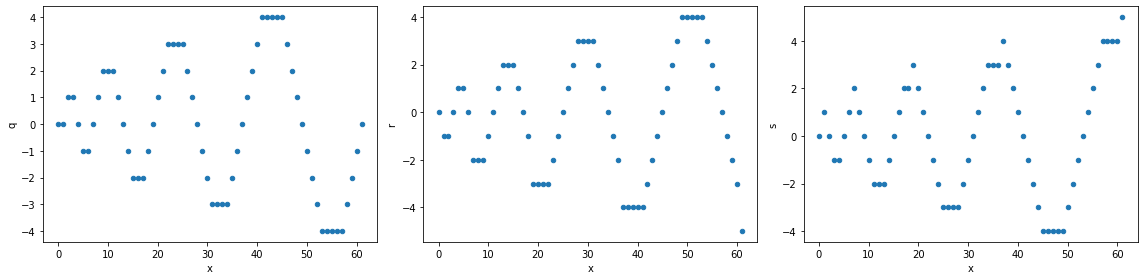

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
fig.set_facecolor('white')

df.plot(x="x",y="q",kind="scatter", ax=ax[0])
df.plot(x="x",y="r",kind="scatter", ax=ax[1])
df.plot(x="x",y="s",kind="scatter", ax=ax[2])

plt.tight_layout()
plt.show()

We have three trapezoidal (or truncated triangle) waves that:
1. Grow in amplitude each cycle (get taller)
2. Grow in period each cycle (get broader)
3. Are 1/3rd of a period out of phase with each other

So, let's define some functions to generate triangle waves and truncate them (forming trapezoidal waves).

You could directly generate trapezoidal waves, but I've found that it's not really worth it.

In [12]:
# Define the function that generates growing triangle wave
def tri_wave(row, p, phi):
    # Row is the row of a pd df
    # p is the period of the triangle wave (6 for a hex grid)
    # phi is the phase offset of the triangle wave

    # Return 0 if the spiral hex number is 0, because ring_number / cycle 0 is a special case
    # that will cause us to divide by 0
    if row.x == 0:
        return 0

    xoffset = row.xoffset
    c = row.ring # the ring number is the same the cycle number, c
    
    # We'll use an equation that uses sin/arcsin here (the Rust version of the code uses modulo instead)
    return (1.5*2*c/np.pi)*np.arcsin(np.sin(2*np.pi*xoffset/(p*c)+(2*np.pi*phi/p)))

# Define a function that generates a truncated triangle wave
def trunc_triwave(row, p,phi):
    # Simulate a triangle wave
    sim = tri_wave(row, p, phi)
    c = row.ring

    # Truncate the wave if its magnitude is greater than the ring/cycle number
    if abs(sim) > c:
        return np.sign(sim)*c
    else:
        return sim

Let's feed in known values from our csv and try to generate our own simulated q,r,s values

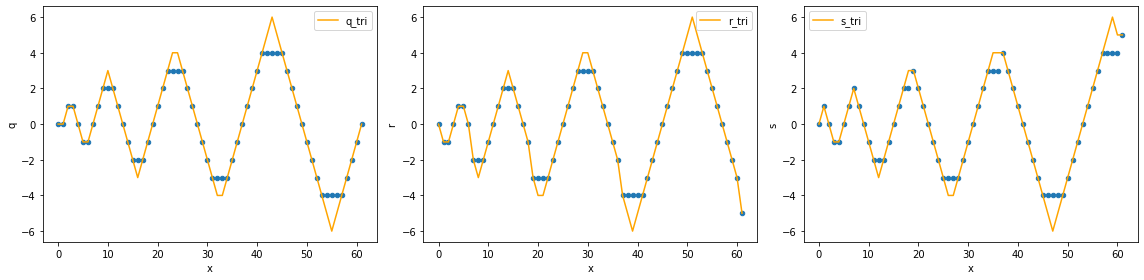

In [10]:
df['q_tri'] = df.apply(lambda row: tri_wave(row,6,0),axis=1) # no phase offset, period of 6
df['r_tri'] = df.apply(lambda row: tri_wave(row,6,-2),axis=1) # phase offset by -2/6 of a period
df['s_tri'] = df.apply(lambda row: tri_wave(row,6,2),axis=1) # phase offset by 2/6 of a period

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
fig.set_facecolor('white')

df.plot(x="x",y="q",kind="scatter", ax=ax[0])
df.plot(x="x",y="q_tri",kind="line",color="orange",ax=ax[0])
df.plot(x="x",y="r",kind="scatter", ax=ax[1])
df.plot(x="x",y="r_tri",kind="line",color="orange",ax=ax[1])
df.plot(x="x",y="s",kind="scatter", ax=ax[2])
df.plot(x="x",y="s_tri",kind="line",color="orange",ax=ax[2])

plt.tight_layout()
plt.show()

Not bad!

Finally, time to do the same again, but this time truncate the triangle waves so that they're never bigger than the ring_no (or cycle number).

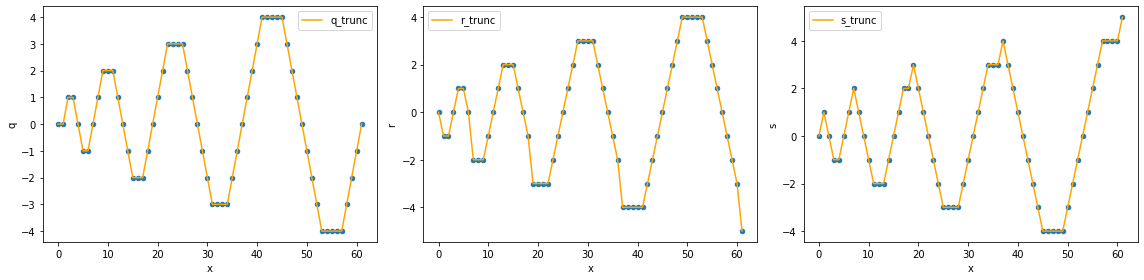

In [11]:
df['q_trunc'] = df.apply(lambda row: trunc_triwave(row,6,0),axis=1) # no phase offset, period of 6
df['r_trunc'] = df.apply(lambda row: trunc_triwave(row,6,-2),axis=1) # phase offset by -2/6 of a period
df['s_trunc'] = df.apply(lambda row: trunc_triwave(row,6,2),axis=1) # phase offset by 2/6 of a period

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
fig.set_facecolor('white')

df.plot(x="x",y="q",kind="scatter", ax=ax[0])
df.plot(x="x",y="q_trunc",kind="line",color="orange",ax=ax[0])
df.plot(x="x",y="r",kind="scatter", ax=ax[1])
df.plot(x="x",y="r_trunc",kind="line",color="orange",ax=ax[1])
df.plot(x="x",y="s",kind="scatter", ax=ax[2])
df.plot(x="x",y="s_trunc",kind="line",color="orange",ax=ax[2])

plt.tight_layout()
plt.show()

Ta da. This completes the mapping from spiral hex number to q,r,s values.

You can do the inverse mapping by searching the cycle of correct amplitude for values of q,r,s that match your inputs, and then finding the corresponding x. This is demonstrated in the Rust code.

TypeError: 'AxesSubplot' object is not subscriptable

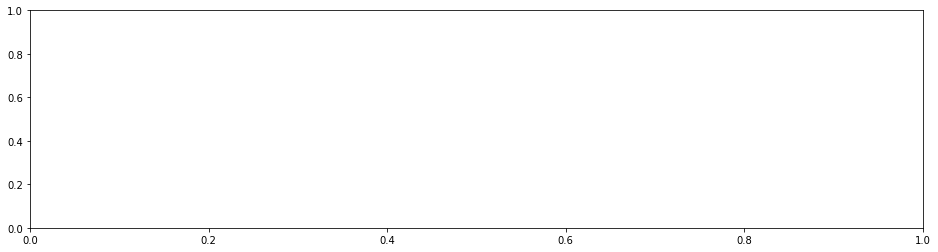

In [13]:
df['simulated'] = df.apply(lambda row: trunc_triwave(row,6,0),axis=1) # no phase offset, period of 6

fig, ax = plt.subplots(figsize=(16, 4))
fig.set_facecolor('white')

df.plot(x="x",y="q",kind="scatter", ax=ax[0])
df.plot(x="x",y="simulated",kind="line",color="orange",ax=ax[0])

plt.tight_layout()
plt.show()